In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress, f_oneway

### Load And Inspect Data
- Marketing Campaign Data of customers


In [2]:
data = pd.read_csv('marketing_data.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835,0,0,6/16/2014,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091,0,0,6/15/2014,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267,0,1,5/13/2014,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474,1,1,5/11/2014,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474,1,0,4/8/2014,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [3]:
data.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.337946,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25037.797524,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Generating the Age column from the Year of Birth of Customers
data['Age'] = data.apply(lambda x: (2021 - x.Year_Birth), axis=1)
data['Age']

0       51
1       60
2       63
3       54
4       32
        ..
2235    45
2236    44
2237    45
2238    43
2239    52
Name: Age, Length: 2240, dtype: int64

## 1. What factors are significantly related to web purchases?
-- consider income, Age, marital, kid/teen home, numof visits to website, customers location

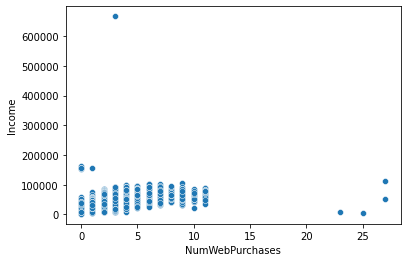

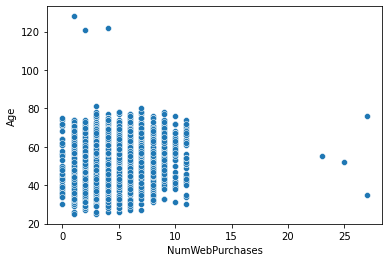

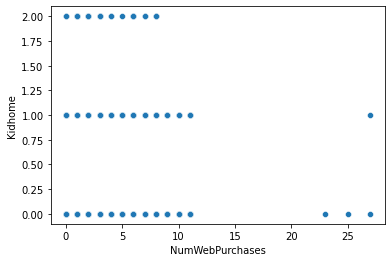

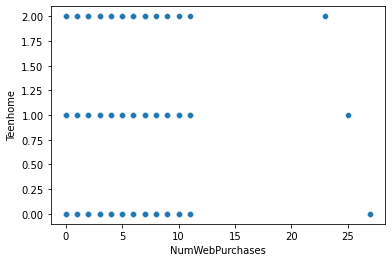

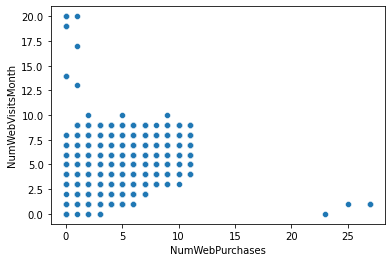

In [6]:
factors = ['Income', 'Age', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth']
for col in factors:
    sns.scatterplot(x=data['NumWebPurchases'], y=data[col])
    plt.show()
    

In [7]:
for col in factors:
  pvalue=linregress(data['NumWebPurchases'], data[col])
  print(col)
  print(pvalue[3])
  #maybe put in a tabular form

Income
4.1397128903448257e-78
Age
5.302978267269858e-12
Kidhome
3.5373183633630724e-70
Teenhome
1.3562979596742414e-13
NumWebVisitsMonth
0.008200075803008078


### Factors Related to Web Purchases Analysis
- `Income` had a P-Value < 0.05 so we reject the Null hypothesis. Therefore, Income is significantly related to web purchases. 
So is `Age`, `Number of Kids home`, `Number of Teens home and Number of web visits per month`. They all have p_values less than the 0.05 threshold.
It can be safely assumed that all these factors are significantly related to Web Purchases. 


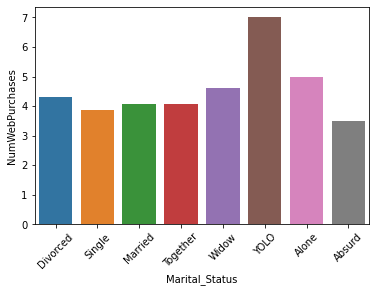

In [8]:
sns.barplot(x=data['Marital_Status'], y=data['NumWebPurchases'], ci=None)
plt.xticks(rotation=45)
plt.show()

In [9]:
CategoryGroupLists=data.groupby('Marital_Status')['NumWebPurchases'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.1983297144287449


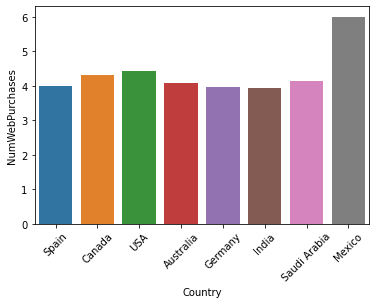

P-Value for Anova is:  0.47190444061606274


In [10]:
sns.barplot(x=data['Country'], y=data['NumWebPurchases'], ci=None)
plt.xticks(rotation=45)
plt.show()

CategoryGroupLists=data.groupby('Country')['NumWebPurchases'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

### Other Factors Related to Web Purchases
- Country and Marital Status have P-Values greater than threshold so the factors are not correlated with Web purchases. 
It means these factors are not significantly related to Web Purchases.

## 2. Which marketing campaign was most successful?

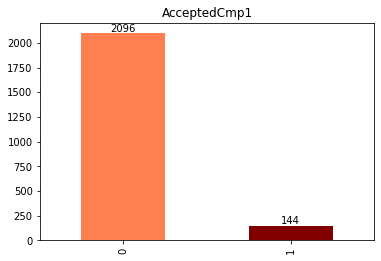

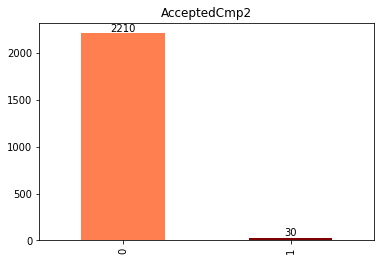

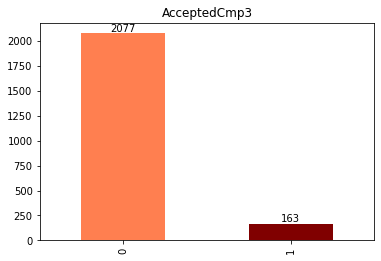

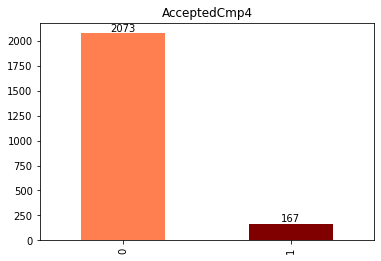

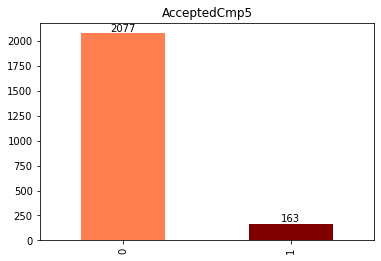

In [11]:
campaigns = {0:'AcceptedCmp1', 1:'AcceptedCmp2', 2:'AcceptedCmp3', 3:'AcceptedCmp4', 4:'AcceptedCmp5'}
for i, col in campaigns.items():
    ax = data[col].value_counts().plot(kind='bar', color=['Coral', 'maroon'])
    ax.bar_label(ax.containers[0])
    plt.title(campaigns[i])
    plt.show()

### Analysis from the various Marketing Campaigns
- The Campaign that was most successful was the fourth campaign, followed by the fifth and third campaigns.
- The least successful campaign is the second campaign. 
It might be because with every other campaign the strategy was revised and made better hence the latter campaigns being more successful. 

## 3. What products are performing the best?


In [12]:
products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_products = []
for col in products:
    total_products.append(sum(data[col]))

dp = list(zip(products, total_products))
dp = pd.DataFrame(dp, columns=['products', 'total_products'])
dp

,products,total_products
0,MntWines,680816
1,MntFruits,58917
2,MntMeatProducts,373968
3,MntFishProducts,84057
4,MntSweetProducts,60621
5,MntGoldProds,98609


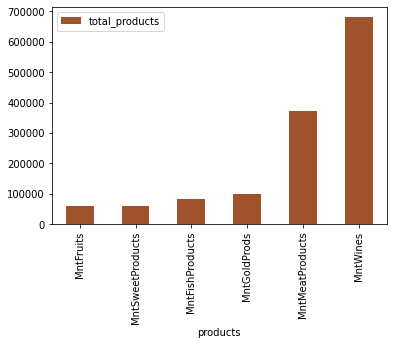

In [13]:
dp = dp.sort_values('total_products')
dp.plot(x='products', y='total_products', kind='bar', color='sienna')
plt.show()

### Analysis of Products
- The best performing product is Wine. Purchase of wine made in the last two years amount to $680,816. 
- The least performing product is Fruit. 

## 4. Which channels are underperforming?
compare web amd other purchases

In [14]:
channels = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
totals = []
for col in channels:
    totals.append(sum(data[col]))

dat = list(zip(channels, totals))
df = pd.DataFrame(dat, columns=['channels', 'totals'])
df

,channels,totals
0,NumDealsPurchases,5208
1,NumWebPurchases,9150
2,NumCatalogPurchases,5963
3,NumStorePurchases,12970


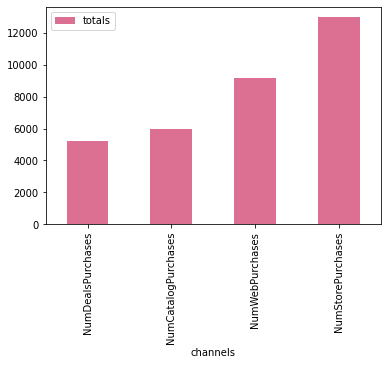

In [15]:
df = df.sort_values('totals')
df.plot(x='channels', y='totals', kind='bar', color='palevioletred')
plt.show()

### Analysis of Channels
- The channels that are underperforming are NumDealsPurchases(Number of Purchases made with a Discount) with total purchases = `5208` and NumCatalogPurchases(Number of Purchases made using a Catalog) with total purchases = `5963`.
- Number of purchases made directly in the stores has the highest number of toal purchases, `12970`, followed by NumWebPurchases(Number of Purchases made through company's website).